<a href="https://colab.research.google.com/github/ayatkatka/bitcoin/blob/main/predict_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt


In [ ]:
dataset=pd.read_csv('bitcoin.csv')


In [ ]:
dataset.head()

,Date,Open,High,Low,Closing,Adj Close,Volume
0,01/01/2015,320.4,320.4,314.0,314.2,314.2,8036550.0
1,02/01/2015,314.1,315.8,313.6,315.0,315.0,7860650.0
2,03/01/2015,314.8,315.1,281.1,281.1,281.1,33054400.0
3,04/01/2015,281.1,287.2,257.6,264.2,264.2,55629100.0
4,05/01/2015,265.1,278.3,265.1,274.5,274.5,43962800.0


In [ ]:
# define function to compute log returns
def log_return(series, periods=1):
    return np.log(series).diff(periods=periods)

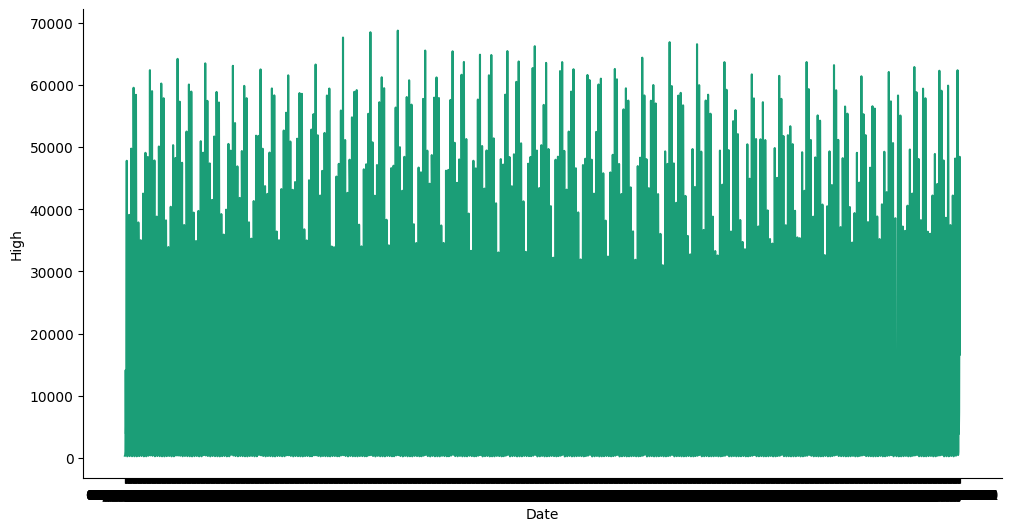

In [ ]:
# @title Date vs High

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Date']
  ys = series['High']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = dataset.sort_values('Date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Date')
_ = plt.ylabel('High')

In [ ]:
dataset['Date'] = pd.to_datetime(dataset.Date, format="%d/%m/%Y")

In [ ]:
dataset['Date'] = pd.to_datetime(dataset.Date)

In [ ]:
dataset.shape

(3171, 7)

In [ ]:
dataset.drop('Adj Close',axis = 1, inplace = True)

In [ ]:
dataset.head()

,Date,Open,High,Low,Closing,Volume
0,2015-01-01,320.4,320.4,314.0,314.2,8036550.0
1,2015-01-02,314.1,315.8,313.6,315.0,7860650.0
2,2015-01-03,314.8,315.1,281.1,281.1,33054400.0
3,2015-01-04,281.1,287.2,257.6,264.2,55629100.0
4,2015-01-05,265.1,278.3,265.1,274.5,43962800.0


In [ ]:
dataset.isnull().sum()

Date       0
Open       0
High       0
Low        0
Closing    0
Volume     0
dtype: int64

In [ ]:
dataset.isna().any()

Date       False
Open       False
High       False
Low        False
Closing    False
Volume     False
dtype: bool

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3171 entries, 0 to 3170
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     3171 non-null   datetime64[ns]
 1   Open     3171 non-null   float64       
 2   High     3171 non-null   float64       
 3   Low      3171 non-null   float64       
 4   Closing  3171 non-null   float64       
 5   Volume   3171 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 148.8 KB


In [ ]:
dataset.describe()

,Date,Open,High,Low,Closing,Volume
count,3171,3171.000000,3171.000000,3171.000000,3171.000000,3.171000e+03
mean,2019-05-05 00:00:00,14332.172438,14674.382971,13956.291990,14338.796279,1.706365e+10
min,2015-01-01 00:00:00,176.900000,211.700000,171.500000,178.100000,7.860650e+06
25%,2017-03-03 12:00:00,1068.200000,1110.850000,1043.950000,1075.900000,2.564590e+08
50%,2019-05-05 00:00:00,8221.600000,8371.200000,8005.300000,8222.100000,1.217532e+10
75%,2021-07-05 12:00:00,22287.350000,22661.450000,21625.400000,22358.000000,2.787545e+10
max,2023-09-06 00:00:00,67549.700000,68789.600000,66382.100000,67566.800000,3.510000e+11
std,NaN,16065.030106,16460.429923,15612.282239,16061.184398,1.943969e+10


In [ ]:
print(len(dataset))

3171


In [ ]:
dataset['Date'] = pd.to_datetime(dataset.Date, format="%d/%m/%Y")

<Axes: >

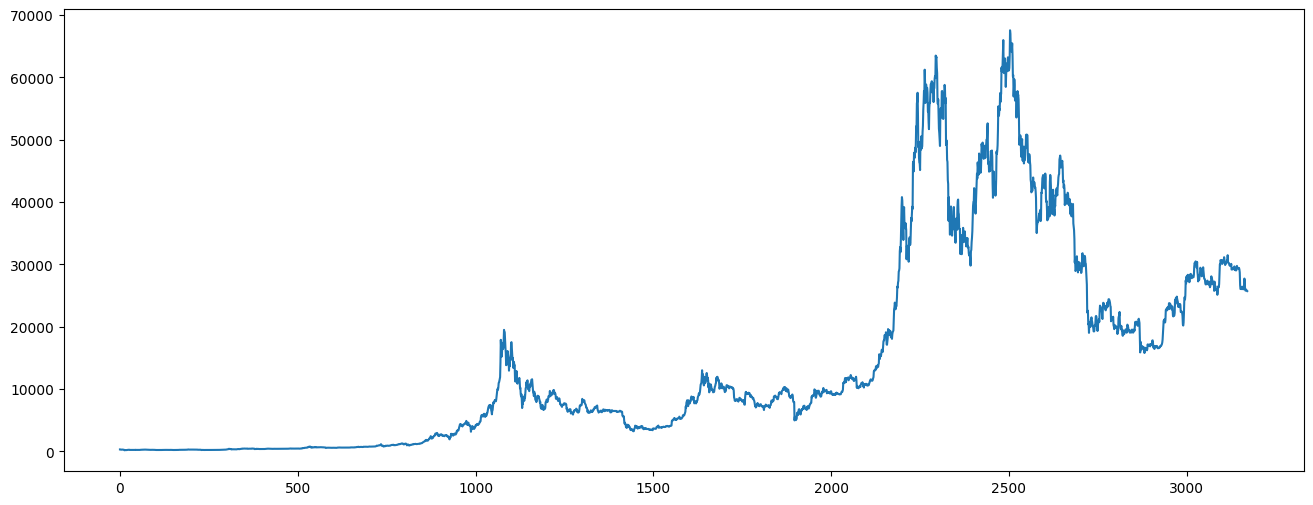

In [ ]:
dataset['Closing'].plot(figsize=(16,6))

In [ ]:
X  = dataset[['Open','High','Low','Volume']]
y = dataset['Closing']

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X ,y , random_state = 0)

In [ ]:
X_train.shape

(2378, 4)

In [ ]:
X_test.shape

(793, 4)

In [ ]:
y_test.shape

(793,)

In [ ]:
y_train.shape

(2378,)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train,y_train)

LinearRegression()

In [ ]:
new_var = print(regressor.coef_)


[-5.60067151e-01  9.13011841e-01  6.42701938e-01 -1.87202587e-10]


In [ ]:
print(regressor.intercept_)

3.5762906658092106


In [ ]:
predicted=regressor.predict(X_test)

In [ ]:
print(X_test)

         Open     High      Low        Volume
316     338.5    340.9    326.1  5.200300e+07
1262   6455.5   6592.5   6402.3  3.194170e+09
1180   8498.5   8530.1   7921.4  5.921040e+09
1677  10960.7  11895.1  10960.7  2.387599e+10
1783   8305.1   8408.5   8100.0  2.108361e+10
...       ...      ...      ...           ...
215     281.2    285.7    281.2  2.190870e+07
2890  16445.5  17190.9  16445.5  2.952358e+10
2962  21819.0  21941.2  21539.4  2.707841e+10
2739  19274.8  19371.7  19027.1  1.810042e+10
392     395.1    395.5    379.7  5.924790e+07

[793 rows x 4 columns]


In [ ]:
predicted.shape

(793,)

In [ ]:
dframe=pd.DataFrame(y_test,predicted)

In [ ]:
dfr=pd.DataFrame({'Actual':y_test,'Predicted':predicted})

In [ ]:
print(dfr)

       Actual     Predicted
316     336.8    334.814663
1262   6550.2   6521.266014
1180   8209.4   8121.918603
1677  11805.7  11765.208893
1783   8206.1   8231.161443
...       ...           ...
215     285.2    287.656574
2890  17168.6  17052.515032
2962  21651.2  21654.391483
2739  19242.3  19120.351030
392     380.3    387.412777

[793 rows x 2 columns]


In [ ]:
dfr.head(25)

,Actual,Predicted
316,336.8,334.814663
1262,6550.2,6521.266014
1180,8209.4,8121.918603
1677,11805.7,11765.208893
1783,8206.1,8231.161443
2990,20187.2,19803.024913
1758,8660.7,8545.760525
3021,29653.0,29428.953522
867,1839.1,1806.360743
2985,22435.5,22464.678462


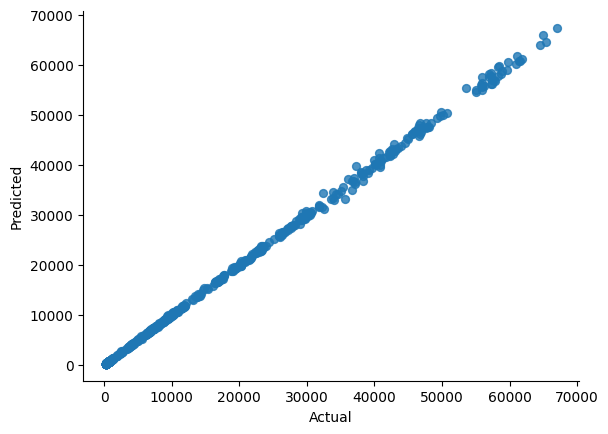

In [ ]:
# @title Actual vs Predicted

from matplotlib import pyplot as plt
dfr.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

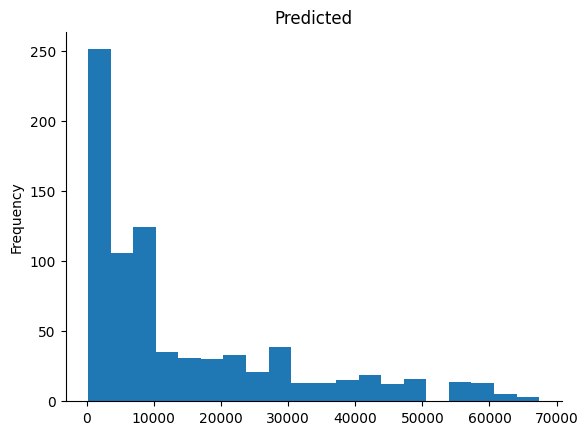

In [ ]:
# @title Predicted

from matplotlib import pyplot as plt
dfr['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

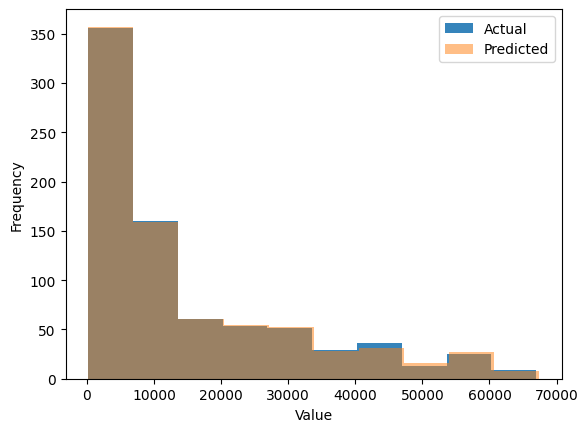

In [ ]:
# @title Distribution of Actual vs Predicted

import matplotlib.pyplot as plt

plt.hist(dfr['Actual'], alpha=0.9, label='Actual')
plt.hist(dfr['Predicted'], alpha=0.5, label='Predicted')
plt.xlabel('Value')
plt.ylabel('Frequency')
_ = plt.legend()

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score


In [ ]:
regressor.score(X_test,y_test)

0.9995598927938282

In [ ]:
import math

In [ ]:
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,predicted))

Mean Absolute Error: 13188.538897637796


In [ ]:
print('Mean Squared  Error:',metrics.mean_squared_error(y_test,predicted))

Mean Squared  Error: 421954857.0214174


In [ ]:
print('Root Mean Squared Error:',math.sqrt(metrics.mean_squared_error(y_test,predicted)))

Root Mean Squared Error: 338.80967875689316


In [ ]:
graph=dfr.head(20)

<Axes: >

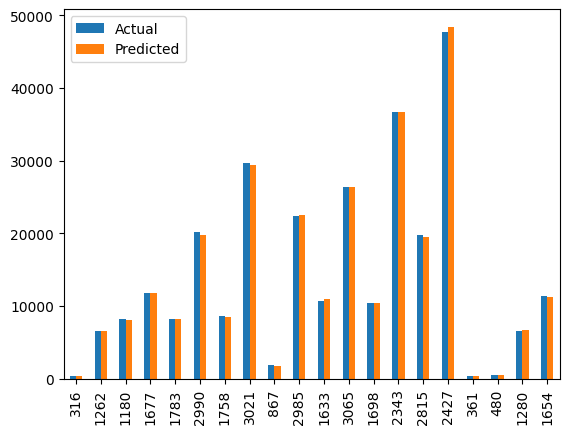

In [ ]:
graph.plot(kind='bar')

In [ ]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


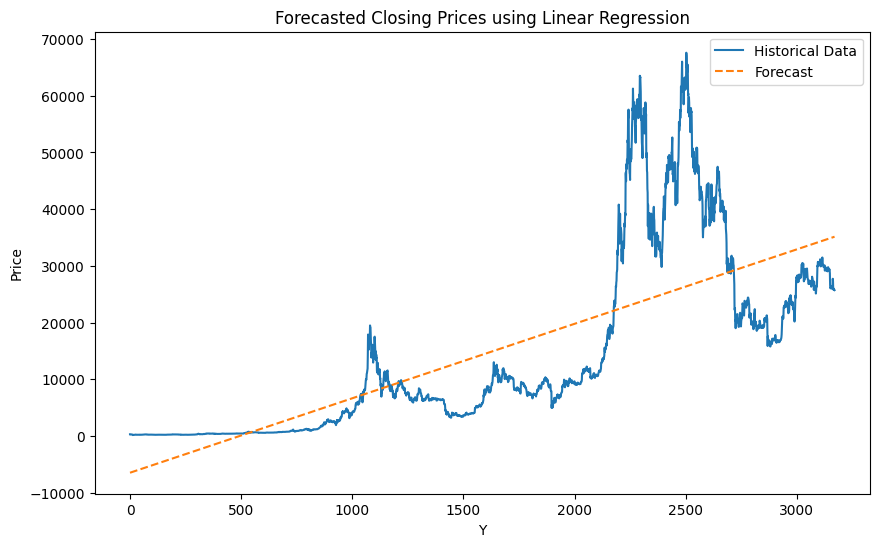

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Load your historical stock price data
df = pd.read_csv('bitcoin.csv')

# Extract features (X) and target variable (y)
X = np.arange(len(df)).reshape(-1, 1)  # Assuming the index represents time
y = df['Closing']

# Fit linear regression model
model = LinearRegression()
model.fit(X, y)

# Make forecasts
forecast = model.predict(X)

# Visualize forecasts
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Closing'], label='Historical Data')
plt.plot(df.index, forecast, label='Forecast', linestyle='--')
plt.xlabel('Y')
plt.ylabel('Price')
plt.title('Forecasted Closing Prices using Linear Regression')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np

# Assuming that 'X' is your feature set and 'y' is the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train) # training the algorithm

# Predicting the Test set results
y_pred = regressor.predict(X_test)

# Evaluating the Algorithm
print('R2: ', metrics.r2_score(y_test, y_pred))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


R2:  0.9995289200428332
Mean Absolute Error: 171.8827138131062
Root Mean Squared Error: 356.6253930855082


In [ ]:
from datetime import datetime

# Given date string
date_string = "04/01/2015"

# Convert to datetime object
date_object = datetime.strptime(date_string, "%d/%m/%Y")

date_object


datetime.datetime(2015, 1, 4, 0, 0)

In [ ]:
sequence_length = 10

In [ ]:
date_object = datetime.strptime(date_string, format="%d/%m/%Y")

TypeError: strptime() takes no keyword arguments

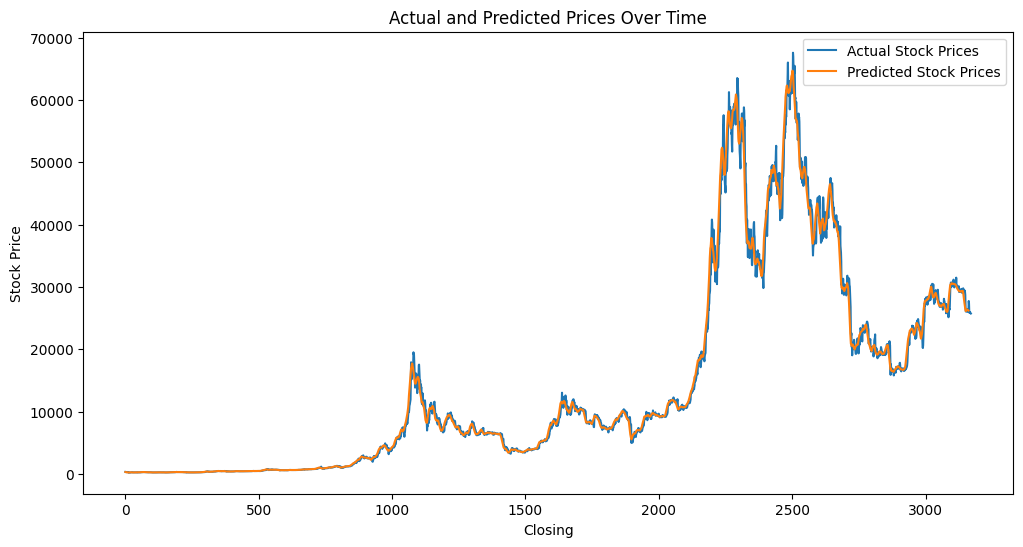

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the actual stock prices
data = pd.read_csv('bitcoin.csv')

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


# Generate a time series for prediction
x = np.array(range(len(data)))
y = np.array(data['Closing'])

# Use a simple moving average (SMA) model for prediction
window_size = 10
y_pred = np.convolve(y, np.ones(window_size)/window_size, mode='valid')

# Visualize the actual and predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Actual Stock Prices')
plt.plot(x[:-window_size+1], y_pred, label='Predicted Stock Prices')
plt.xlabel('Closing')
plt.ylabel('Stock Price')
plt.title('Actual and Predicted Prices Over Time')
plt.legend()
plt.show()

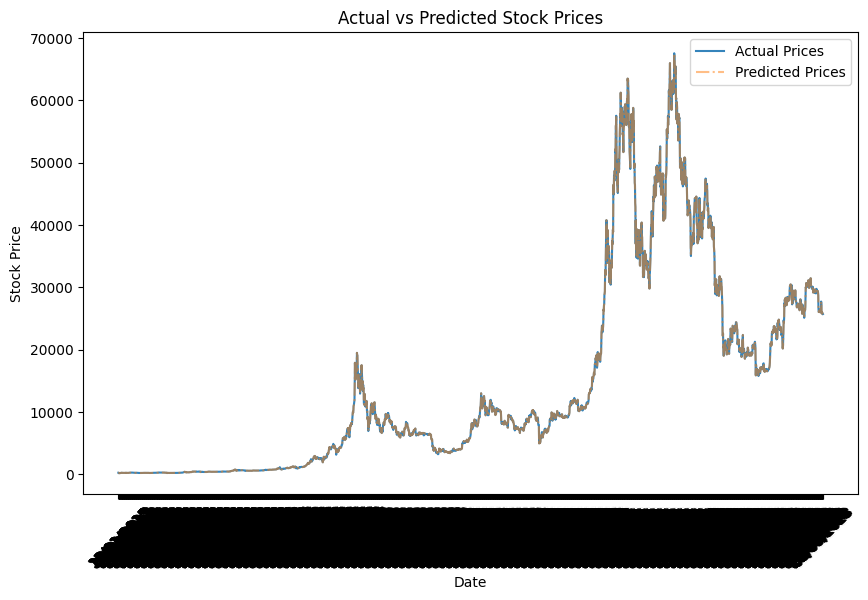

In [ ]:
# Visualize actual vs predicted prices

plt.figure(figsize=(10, 6))
plt.plot(df['Date'].iloc[sequence_length:], df['Closing'].iloc[sequence_length:], alpha=0.9, label='Actual Prices')
plt.plot(df['Date'].iloc[sequence_length:], df['Closing'].iloc[sequence_length:],  alpha=0.5, label='Predicted Prices', linestyle='-.')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual vs Predicted Stock Prices')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend()
plt.show()

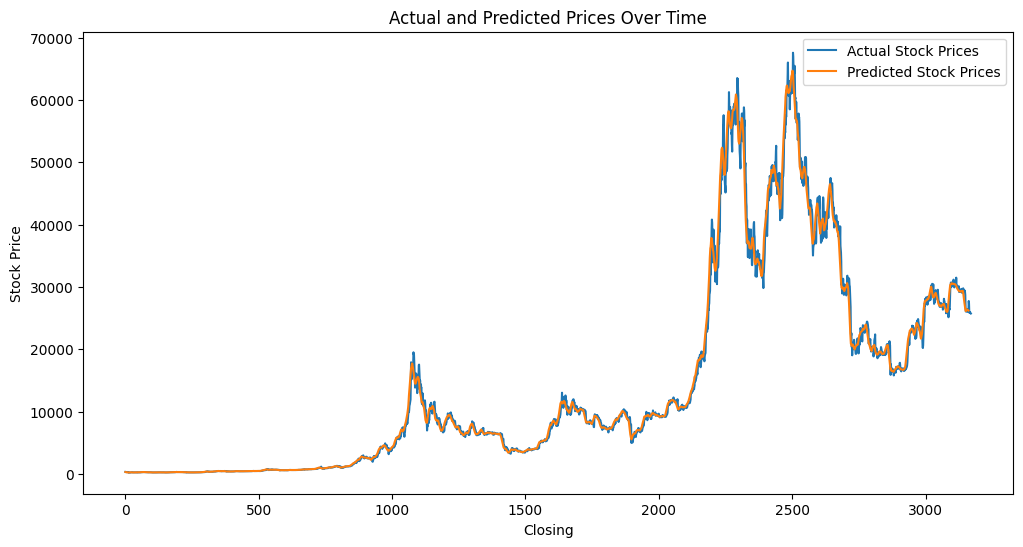

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the actual stock prices
data = pd.read_csv('bitcoin.csv')

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)


# Generate a time series for prediction
x = np.array(range(len(data)))
y = np.array(data['Closing'])

# Use a simple moving average (SMA) model for prediction
window_size = 10
y_pred = np.convolve(y, np.ones(window_size)/window_size, mode='valid')

# Visualize the actual and predicted stock prices
plt.figure(figsize=(12, 6))
plt.plot(x, y, label='Actual Stock Prices')
plt.plot(x[:-window_size+1], y_pred, label='Predicted Stock Prices')
plt.xlabel('Closing')
plt.ylabel('Stock Price')
plt.title('Actual and Predicted Prices Over Time')
plt.legend()
plt.show()

<ipython-input-111-c34c599ba2be>:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  predicted_prices = pd.read_csv('re.CSV', index_col='Date', parse_dates=True)


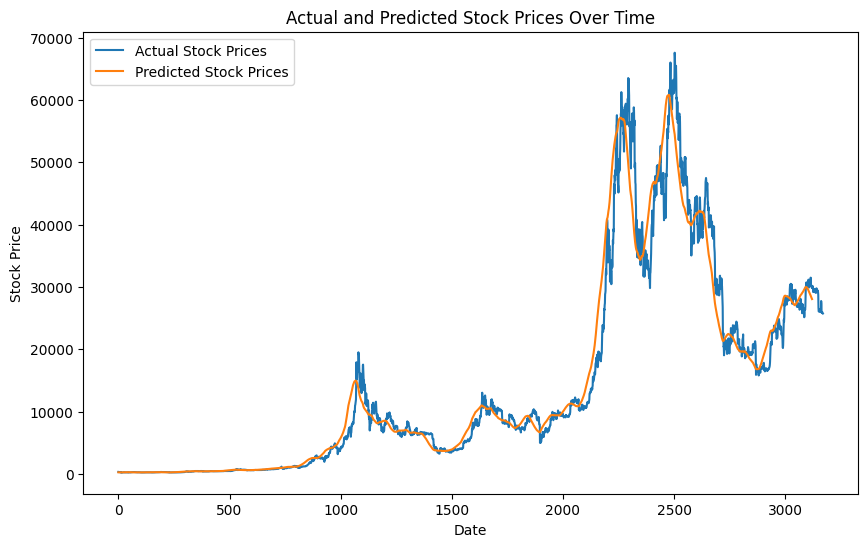

In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


Date = pd.read_csv('actual.csv', index_col='Date', parse_dates=True)
predicted_prices = pd.read_csv('re.CSV', index_col='Date', parse_dates=True)



x = np.array(range(len(data)))
y = np.array(data['Closing'])

# Use a simple moving average (SMA) model for prediction
window_size = 50
y_pred = np.convolve(y, np.ones(window_size)/window_size, mode='valid')

# Visualize the actual and predicted stock prices
plt.figure(figsize=(10, 6))
plt.plot(x, y, label='Actual Stock Prices')
plt.plot(x[:-window_size+1], y_pred, label='Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Actual and Predicted Stock Prices Over Time')
plt.legend()
plt.show()